# ACS Multiyear Analyses

The `multiyear` module provides three functions to facilitate analyzing ACS data over multiple years:
  * download_multiyear
  * graph_multiyear
  * pct_change_multiyear

These functions exist because the Census API (and by extension `censusdis.data.download`) only allows you to download one year of data at a time. 

Downloading data over multiple years is complicated because sometimes a variable's label changes meaning over years. `download_multiyear` warns you if this occurs.

## download_multiyear

The API for `download_multiyear` is designed to mirror that of `censusdis.data.download`. Here is an example of using it to download all ACS 1-year estimates for table B02001 (Race) for Nassau County, NY.

In [1]:
from censusdis.states import NY
from censusdis.counties.new_york import NASSAU
from censusdis.datasets import ACS1

from censusdis.multiyear import download_multiyear

# In 2020 there were no 1-year estimates published due to Covid-19
vintages = [year for year in range(2005, 2024) if year != 2020]

df = download_multiyear(
    dataset=ACS1, vintages=vintages, group="B02001", state=NY, county=NASSAU
)
df

..................

,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Year
0,1310076,993164,140878,2355,84132,0,75034,14513,3347,11166,2005
1,1325662,984965,143755,1767,91602,47,87759,15767,5914,9853,2006
2,1306533,979203,143689,1136,91584,0,70005,20916,5732,15184,2007
3,1351625,1021756,147949,2937,95709,51,59899,23324,5759,17565,2008
4,1357429,1010085,151411,1572,97627,211,76650,19873,3818,16055,2009
5,1341245,966449,146040,1578,106254,50,86507,34367,13688,20679,2010
6,1344436,961070,150682,3274,105175,74,92146,32015,12799,19216,2011
7,1349233,961151,153537,2590,107641,105,84805,39404,16293,23111,2012
8,1352146,941678,152023,4095,114533,296,81654,57867,24772,33095,2013
9,1358627,940760,157184,2740,118337,0,92109,47497,12148,35349,2014


Note that `download_multiyear` has some default parameters.
  * `rename_vars=True`. If True then rename the columns from variables to labels. The labels from the last year are used. Only the last portion of the label (`!!` is a separator) is used and any trailing `:` is dropped.
  * `drop_cols=True`. If True then drops columns which do not contain survey data. This tends to be geographic metadata.
  * `prompt=True`. download_multiyear emits a warning if a variable’s label changed during the selected years. If prompt is True then users are also prompted to confirm that they want to continue with the download despite the label mismatch. In order to reduce false positives `:` is removed when doing the comparison (e.g. “Total:” and “Total” are considered identical).

Setting `rename_vars=False` and `drop_cols=False` will result in output similar to what you would get by calling `censusdis.download` multiple times and manually concatenating the output.

## graph_multiyear


We can use `graph_multiyear` to graph the output of `download_multiyear`. The dataframe has 11 columns, and most of the values are very small. So let's just graph the four columns with the largest final values.

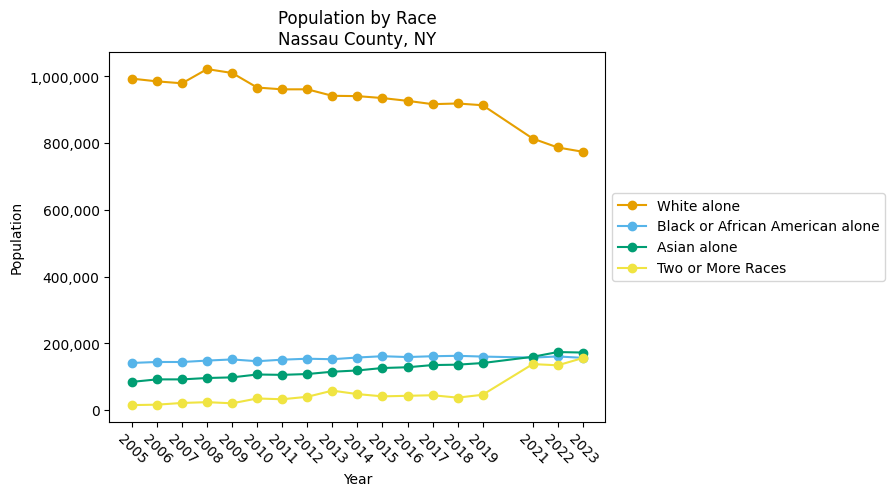

In [2]:
from censusdis.multiyear import graph_multiyear

graph_multiyear(
    df,
    title="Population by Race\nNassau County, NY",
    yaxis_title="Population",
    y_cols=[
        "White alone",
        "Black or African American alone",
        "Asian alone",
        "Two or More Races",
    ],
)

One thing that stands out about this graph are the changes between 2019 and 2021. During that period there was a dramatic decrease in the "White alone" population, and a dramatic increase in the "Two or More Races" population. 

## pct_change_multiyear

The above graph shows us raw population accounts. Another way to look at the data is as a year-over-year percent change. The function `pct_change_multiyear` does this for us.

,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Two or More Races,Two races including Some Other Race,"Two races excluding Some Other Race, and three or more races",Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005
1,1.2,-0.8,2.0,-25.0,8.9,inf,17.0,8.6,76.7,-11.8,2006
2,-1.4,-0.6,-0.0,-35.7,-0.0,-100.0,-20.2,32.7,-3.1,54.1,2007
3,3.5,4.3,3.0,158.5,4.5,inf,-14.4,11.5,0.5,15.7,2008
4,0.4,-1.1,2.3,-46.5,2.0,313.7,28.0,-14.8,-33.7,-8.6,2009
5,-1.2,-4.3,-3.5,0.4,8.8,-76.3,12.9,72.9,258.5,28.8,2010
6,0.2,-0.6,3.2,107.5,-1.0,48.0,6.5,-6.8,-6.5,-7.1,2011
7,0.4,0.0,1.9,-20.9,2.3,41.9,-8.0,23.1,27.3,20.3,2012
8,0.2,-2.0,-1.0,58.1,6.4,181.9,-3.7,46.9,52.0,43.2,2013
9,0.5,-0.1,3.4,-33.1,3.3,-100.0,12.8,-17.9,-51.0,6.8,2014


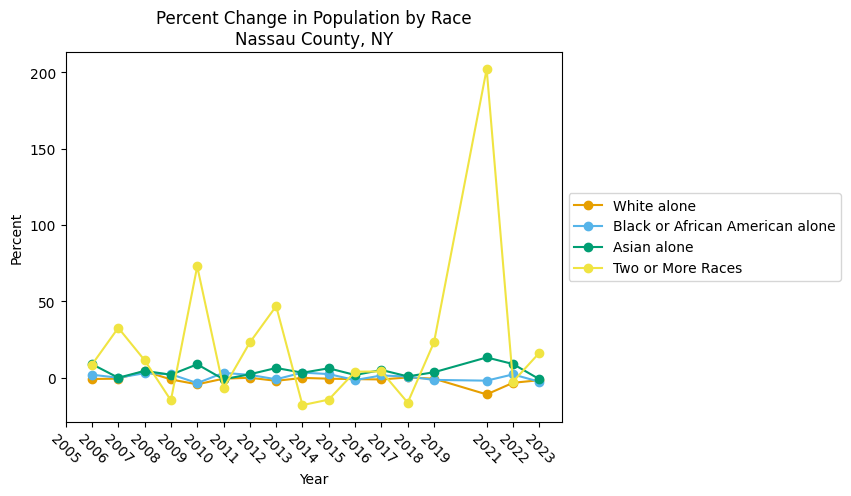

In [3]:
from IPython.display import display

from censusdis.multiyear import pct_change_multiyear

df_pct_change = pct_change_multiyear(df)
display(df_pct_change)

graph_multiyear(
    df_pct_change,
    title="Percent Change in Population by Race\nNassau County, NY",
    yaxis_title="Percent",
    y_cols=[
        "White alone",
        "Black or African American alone",
        "Asian alone",
        "Two or More Races",
    ],
)

Here we get a new appreciation for the magnitude of the change in the population of people who identify as "Two or More Races".

# download_variables

Sometimes it is useful to get a single variable (as opposed to an entire table) over multiple years. An example is if the table has a large number of columns, or the number of columns has changed over the years. An example is B05006: Place of Birth for the Foreign-born Population in the United States.

At the time of this writing the most recent data is from 2023 ([link](https://api.census.gov/data/2023/acs/acs1/groups/B05006.html)) and we can see that `China` has variable `B05006_049E`. Here's what happens if we try to get data on that variable for all available years:

In [4]:
df = download_multiyear(
    dataset=ACS1,
    vintages=vintages,
    download_variables="B05006_049E",
    state=NY,
    county=NASSAU,
    prompt=False,
)

	'estimate!!total!!asia!!south central asia!!other south central asia' in [2005, 2006, 2007, 2008]
	'estimate!!total!!asia!!eastern asia!!china' in [2009, 2010, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023]
	'estimate!!total!!asia!!eastern asia!!china!!china, excluding hong kong and taiwan' in [2012]


The warning means that the same variable (B05006_049E) had different labels over the years. In this case the labels include completely different places, and so treating the variable as a true time series would be a mistake.

The easiest way I know to find a label for different years is to search the API page for the table. 

 * For 2005-2008 visit https://api.census.gov/data/2005/acs/acs1/groups/B05006.html. Searching for "China" reveals it has variable `B05006_036E`. 
 * For 2012 visit https://api.census.gov/data/2012/acs/acs1/groups/B05006.html. Searching for "China" reveals it has variable `B05006_048E`.

 With this in mind we can splice the data together like this:

..................

,China,Year
0,11069.0,2005
1,10495.0,2006
2,9878.0,2007
3,16814.0,2008
0,13783.0,2009
1,13043.0,2010
2,14456.0,2011
0,18878.0,2012
3,14648.0,2013
4,22539.0,2014


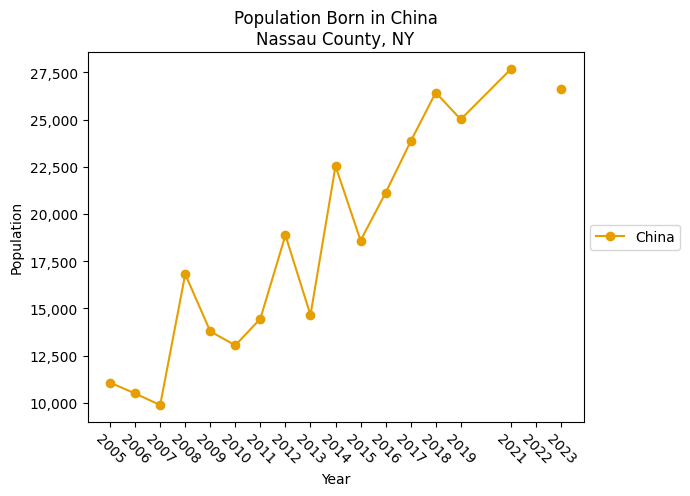

In [6]:
import pandas as pd

vintages1 = list(range(2005, 2009))
df1 = download_multiyear(
    dataset=ACS1,
    vintages=vintages1,
    download_variables="B05006_036E",
    state=NY,
    county=NASSAU,
)

# Skip 2012 (it had a different label) and 2020 (it was not published due to covid)
vintages2 = [year for year in range(2009, 2024) if year not in [2012, 2020]]
df2 = download_multiyear(
    dataset=ACS1,
    vintages=vintages2,
    download_variables="B05006_049E",
    state=NY,
    county=NASSAU,
)

vintages3 = [2012]
df3 = download_multiyear(
    dataset=ACS1,
    vintages=vintages3,
    download_variables="B05006_048E",
    state=NY,
    county=NASSAU,
)

df_china = pd.concat([df1, df2, df3]).sort_values("Year")
display(df_china)

graph_multiyear(df_china, "Population Born in China\nNassau County, NY", "Population")